In [ ]:
import torch

# device agnostic code setup
device = 'cuda' if torch.cuda.is_available() else 'cpu'

weight = 0.7
bias = 0.3

x = torch.arange(0, 1, 0.02).unsqueeze(dim=1) # add a batch dimension, new shape is (50, 1)
x = x.to(device) # allocate tensor to device
print(x.device)

y = weight * x + bias # generate true labels using the known weight and bias
y = y.to(device)
print(y.device)


cpu
cpu


In [ ]:
training_split = int(0.8 * len(x))
train_x, train_y = x[:training_split], y[:training_split]
test_x, test_y = x[training_split:], y[training_split:]

print(len(train_x))
print(len(train_y))
print(len(test_x))
print(len(test_y))

40
40
10
10


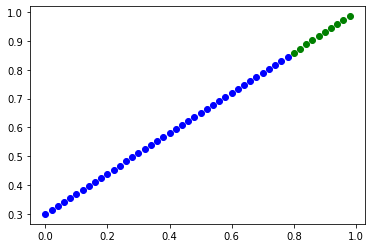

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(train_x.cpu().numpy(), train_y.cpu().numpy(), color='b', label='Training Data')
plt.scatter(test_x.cpu().numpy(), test_y.cpu().numpy(), color='g', label='Test Data')
plt.show()

In [ ]:
import torch
from torch import nn # neural network modules

# build linear regression module
class LinearRegression(nn.Module): # every custom module is submodule of nn.Module
  def __init__(self):
    super().__init__() # always the first line
    # initialize parameters from standard normal distribution
    self.weight = nn.Parameter(torch.randn(1, dtype=torch.float32)) # requires_grad = true
    self.bias = nn.Parameter(torch.randn(1, dtype=torch.float32)) # requires_grad = true

    # nn.Parameter are tensor subclasses automatically stored in module parameter list

  # forward pass computation, should always be overwritten for nn.Module subclasses
  def forward(self, x):
    return self.weight * x + self.bias

In [ ]:
torch.manual_seed(42)
# Instantiate model
model = LinearRegression()

model = model.to(device)
# List the named parameters of the model
print(model.state_dict())

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])


In [ ]:
# loss function
loss_func = nn.L1Loss() # MAE
print(loss_func)

L1Loss()


In [ ]:
# gradient descent optimizer
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01) # parameters defined in the module subclass that will be optimized
print(optimizer)

SGD (
Parameter Group 0
    dampening: 0
    foreach: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)


In [ ]:
# training loop
max_epochs = 200 # number of iterations to train the model

for epoch in range(max_epochs):
  model.train() # set the model in training mode and track gradients of parameters, default

  # 1. forward pass
  y_pred = model(train_x)
  
  # 2. calculate loss
  loss = loss_func(y_pred, train_y)

  # 3. prevent the optimizer accumulating past gradients, gradient update should only use the most recently calculated gradient (the one to be calculated in the next step)
  optimizer.zero_grad()

  # 4. backpropagation, calculate gradient of the loss with respect to the parameters marked with requires_grad = true
  loss.backward()

  # gradient descent update
  optimizer.step()

  # testing
  model.eval() # switch off certain settings for the model
  with torch.inference_mode(): # turns off gradient tracking and other things not needed for testing. allow for faster optimization of computation
    # calculate predictions using the unseen test data
    y_test_pred = model(test_x)

    # calculate MAE loss between predictions and testing labels
    test_loss = loss_func(y_test_pred, test_y)

    print(test_loss)
    print(model.state_dict())



tensor(0.4811)
OrderedDict([('weight', tensor([0.3406])), ('bias', tensor([0.1388]))])
tensor(0.4676)
OrderedDict([('weight', tensor([0.3445])), ('bias', tensor([0.1488]))])
tensor(0.4541)
OrderedDict([('weight', tensor([0.3484])), ('bias', tensor([0.1588]))])
tensor(0.4407)
OrderedDict([('weight', tensor([0.3523])), ('bias', tensor([0.1688]))])
tensor(0.4272)
OrderedDict([('weight', tensor([0.3562])), ('bias', tensor([0.1788]))])
tensor(0.4137)
OrderedDict([('weight', tensor([0.3601])), ('bias', tensor([0.1888]))])
tensor(0.4002)
OrderedDict([('weight', tensor([0.3640])), ('bias', tensor([0.1988]))])
tensor(0.3868)
OrderedDict([('weight', tensor([0.3679])), ('bias', tensor([0.2088]))])
tensor(0.3733)
OrderedDict([('weight', tensor([0.3718])), ('bias', tensor([0.2188]))])
tensor(0.3598)
OrderedDict([('weight', tensor([0.3757])), ('bias', tensor([0.2288]))])
tensor(0.3464)
OrderedDict([('weight', tensor([0.3796])), ('bias', tensor([0.2388]))])
tensor(0.3329)
OrderedDict([('weight', tens

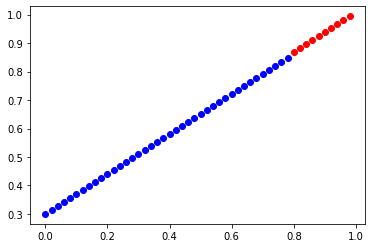

In [ ]:
plt.scatter(train_x.cpu().numpy(), train_y.cpu().numpy(), color='b', label='Training Data')
plt.scatter(test_x.cpu().numpy(), y_test_pred.cpu().numpy(), color='r', label='Test Data')
plt.show() 

In [ ]:
# saving a pytorch model

from pathlib import Path

save_folder = Path("Models")
save_folder.mkdir(parents=True, exist_ok=True)

file_name = Path("01_linear_regression.pth")
file_path = save_folder / file_name
torch.save(model.state_dict(), file_path)

# loading a pytorch model

model2 = LinearRegression() # create new instance of model class
model2.load_state_dict(torch.load(file_path)) # load the saved state dict of the previous model

print(model2.state_dict())

OrderedDict([('weight', tensor([0.6990])), ('bias', tensor([0.3093]))])
